# Lista 02

Instituição: Pontifícia Universidade Católica de Minas Gerais

Aluno: Vitor Fernando de Souza Rodrigues

Disciplina: Técnicas de Amostragem e Modelos de Regressão

Docente: Anaíle Mendes Rabelo

## Exercício 1 –  A partir da base de dados 'propaganda.csv' faça um modelo de regressão múltipla para predizer as vendas:

1. Análise descritiva

2. Calculo de correlação e covariância

3. Faça o modelo de regressão

4. Realize a análise de resíduos

5. Análise de multicolinearidade

6. Análise do Modelo

In [1]:
# Importação de bibliotecas necessárias para resolução do exercício

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

### 1. Análise descritiva

In [2]:
# Importação dos dados
prop = pd.read_csv('propaganda.csv')
prop.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
prop.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


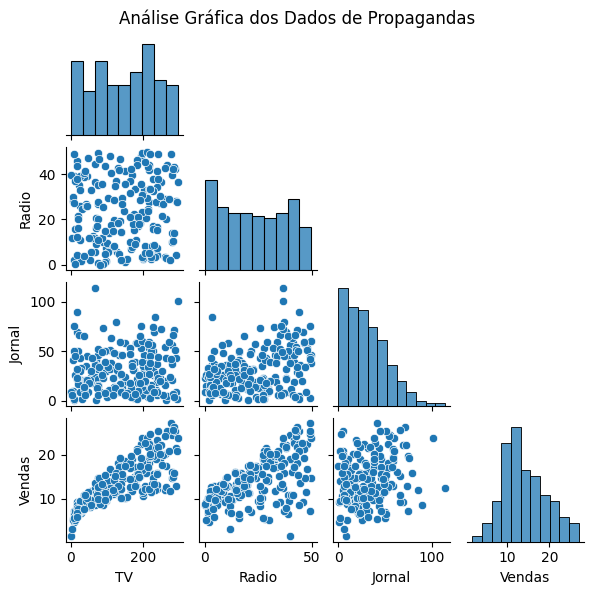

In [5]:
# Análise gráfica - Pairplot
sns.pairplot(prop, corner=True, height=1.5)
plt.suptitle("Análise Gráfica dos Dados de Propagandas")
plt.show()

Da base de dados recebida, temos as seguintes pontuações:
* Todas as colunas são do tipo float;
* Não há dados nulos na base o que retira a necessidade de tratamento prévio;
* Esta base possui 200 linhas;
* A média da coluna 'TV' está bem distante das demais médias;
* Apenas analisando o pair-plot a coluna'TV' possui uma certa relação com 'vendas'. As demais colunas aparentam uma variação bastante aleatória.

### 2. Calculo de correlação e covariância

<Axes: >

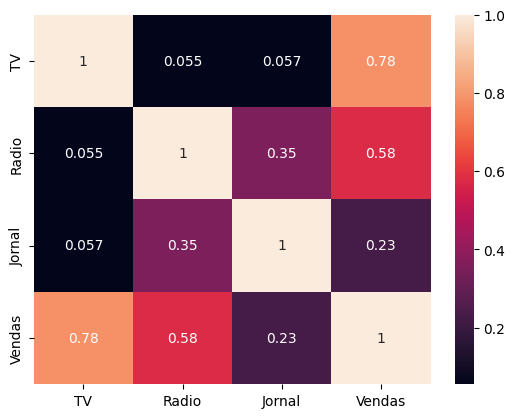

In [6]:
# Mapa de correlação
corr = prop.corr()
sns.heatmap(corr, annot=True)

O que corrobora com o pairplot exposto anteriormente, a maior correlação entre variáveis é 'TV' com 'Vendas', seguido de 'Radio' e 'Jornal' com vendas.

### 3. Faça o modelo de regressão

Inicialmente vamos realizar modelo de regressão simples com apenas uma única variável.

In [7]:
# Definindo a variável dependente (Vendas) e independentes
X = prop['TV']  # Variável independente (TV)
X_radio = prop['Radio']  # Variável independente (Radio)
X_jornal = prop['Jornal']  # Variável independente (Jornal)
y = prop['Vendas']  # Variável dependente (Vendas)

# Adicionando uma constante à variável independente
X = sm.add_constant(X)
X_radio = sm.add_constant(X_radio)
X_jornal = sm.add_constant(X_jornal)

# Ajustando o modelo de regressão linear
modelo_tv = sm.OLS(y, X).fit()
modelo_radio = sm.OLS(y, X_radio).fit()
modelo_jornal = sm.OLS(y, X_jornal).fit()

# Sumário do modelo
modelo_tv_summary = modelo_tv.summary()
modelo_radio_summary = modelo_radio.summary()
modelo_jornal_summary = modelo_jornal.summary()

# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária.
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto).

### 4. Realize a análise de resíduos

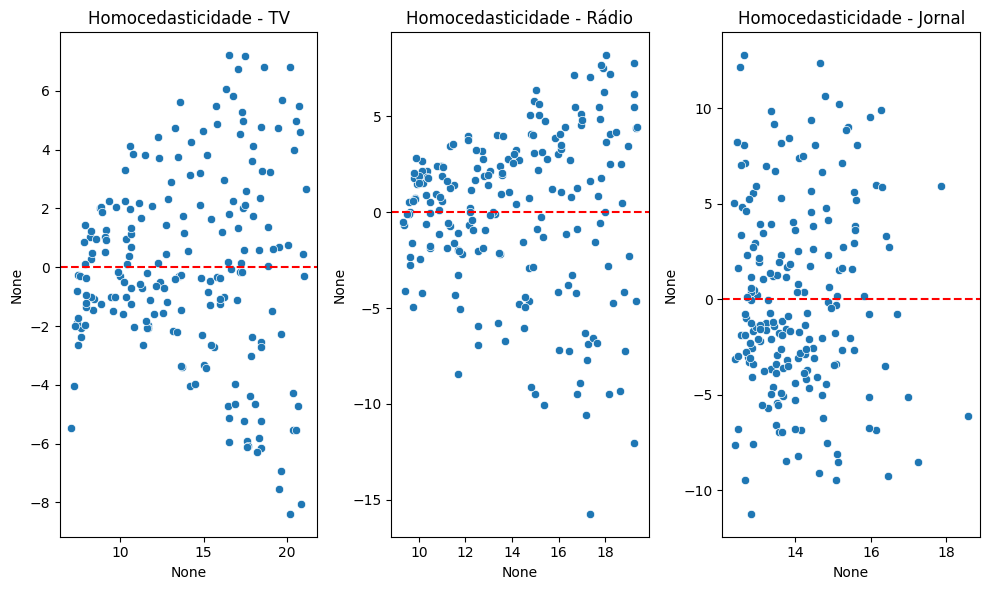

In [8]:
# Resíduos dos modelos
residuos_tv = modelo_tv.resid
residuos_radio = modelo_radio.resid
residuos_jornal = modelo_jornal.resid

# Gráfico de homocedasticidade
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=modelo_tv.fittedvalues, y=residuos_tv)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - TV')

plt.subplot(1, 3, 2)
sns.scatterplot(x=modelo_radio.fittedvalues, y=residuos_radio)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Rádio')

plt.subplot(1, 3, 3)
sns.scatterplot(x=modelo_jornal.fittedvalues, y=residuos_jornal)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Jornal')

plt.tight_layout()
plt.show()

O último grafico mostra pontos aleatoriamente espalhados em torno do zero. A faixa de dispersão aparenta estar constante o que pode indicar homocedasticidade no modelo.
Já nos gráficos 1 e 2, existe um padrão claro e uma ampla dispersão, podendo indicar heterocedasticidade.

#### Teste de Homocedasticidade com Breusch-Pagan

In [9]:
# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_tv", modelo_tv, prop['TV']),
    ("modelo_radio", modelo_radio, prop['Radio']),
    ("modelo_jornal", modelo_jornal, prop['Jornal'])
]

for nome, modelo, col in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {estatistica:.2e}')
    print(f'p-valor: {p:.2e}')
    print(f'f-valor: {fp:.2e}')
    print(f'f_p-valor: {f:.2e}')

Estatísticas de teste para modelo_tv: 4.80e+01
p-valor: 4.18e-12
f-valor: 1.76e-13
f_p-valor: 6.26e+01
Estatísticas de teste para modelo_radio: 3.66e+01
p-valor: 1.42e-09
f-valor: 2.57e-10
f_p-valor: 4.44e+01
Estatísticas de teste para modelo_jornal: 2.47e+00
p-valor: 1.16e-01
f-valor: 1.17e-01
f_p-valor: 2.48e+00


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
* modelo_tv     p-valor < 0.05
* modelo_radio  p-valor < 0.05
* modelo_jornal p-valor > 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [10]:
for nome, modelo, col in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {estatistica_shapiro:.2e}')
    print(f'p-valor: {p_shapiro:.2e}')

Estatísticas de teste modelo_tv: 9.91e-01
p-valor: 2.13e-01
Estatísticas de teste modelo_radio: 9.61e-01
p-valor: 2.37e-05
Estatísticas de teste modelo_jornal: 9.82e-01
p-valor: 1.14e-02


#### Shapiro:
Se p-valor do shapiro é superior a 0.05, isso indica que os resíduos seguem aproximadamente uma distribuição normal.

- modelo_tv     p-valor > 0.05
- modelo_radio  p-valor > 0.05
- modelo_jornal p-valor < 0.05

#### Análise de normalidade QQ-plot

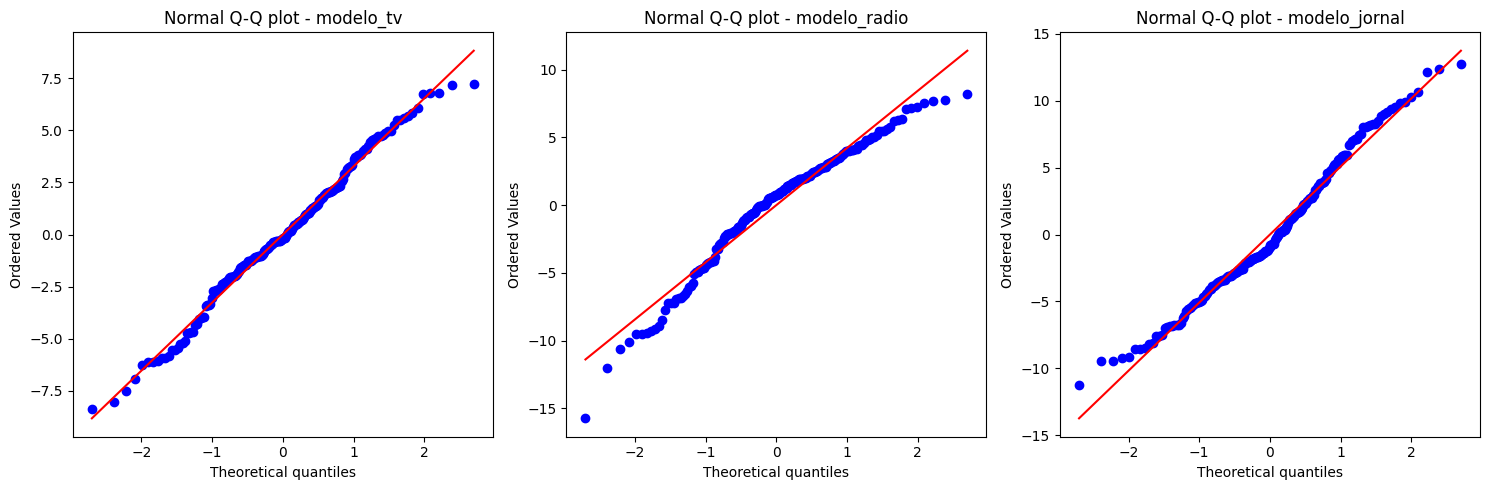

In [11]:
num_modelos = len(modelos)

fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    stats.probplot(modelo.resid,dist="norm", plot=ax)
    ax.set_title(f"Normal Q-Q plot - {nome}")
plt.tight_layout()
plt.show()

Aparentemente todos se aproximam da reta e parecem ser normais.

#### Análise de resíduos Padronizados

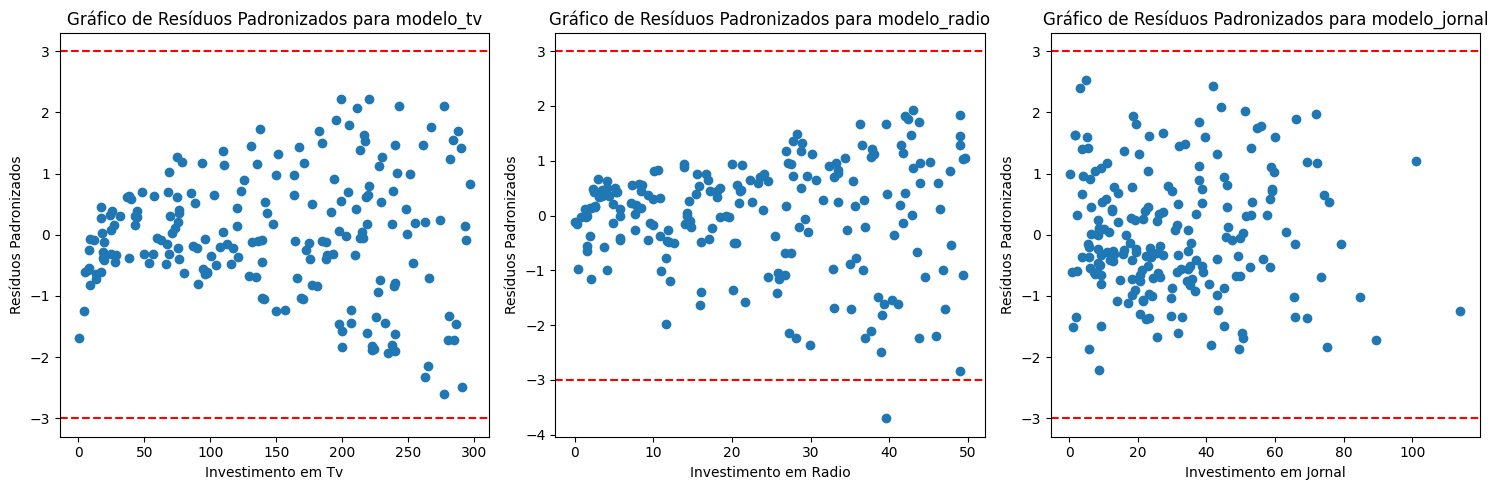

In [12]:
num_modelos = len(modelos)

fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    ax.scatter(col, residuos_padronizados)
    ax.axhline(y=3, color='r', linestyle='--')
    ax.axhline(y=-3, color='r', linestyle='--')
    ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
    ax.set_xlabel('Investimento em ' + nome.split("_")[1].capitalize())
    ax.set_ylabel('Resíduos Padronizados')
    
plt.tight_layout()
plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3

#### Análise geral dos residuos: 
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| TV      | ❌                                | ✅                          | ✅       | ✅        |
| Rádio   | ❌                                | ❌                          | ✅       | ✅        |
| Jornal  | ✅                                | ❌                          | ✅       | ✅        |

### 4.1 Realizando comparação considerando modelo com todas as variáveis

In [13]:
# Definindo a variável dependente (Vendas) e independente
X = prop[['TV', 'Radio', 'Jornal']]  # Variáveis
y = prop['Vendas']  # Variável dependente (Vendas)

# Adicionando uma constante à variável independente
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
modelo_total = sm.OLS(y, X).fit()

# Sumário do modelo
modelo_summary = modelo_total.summary()

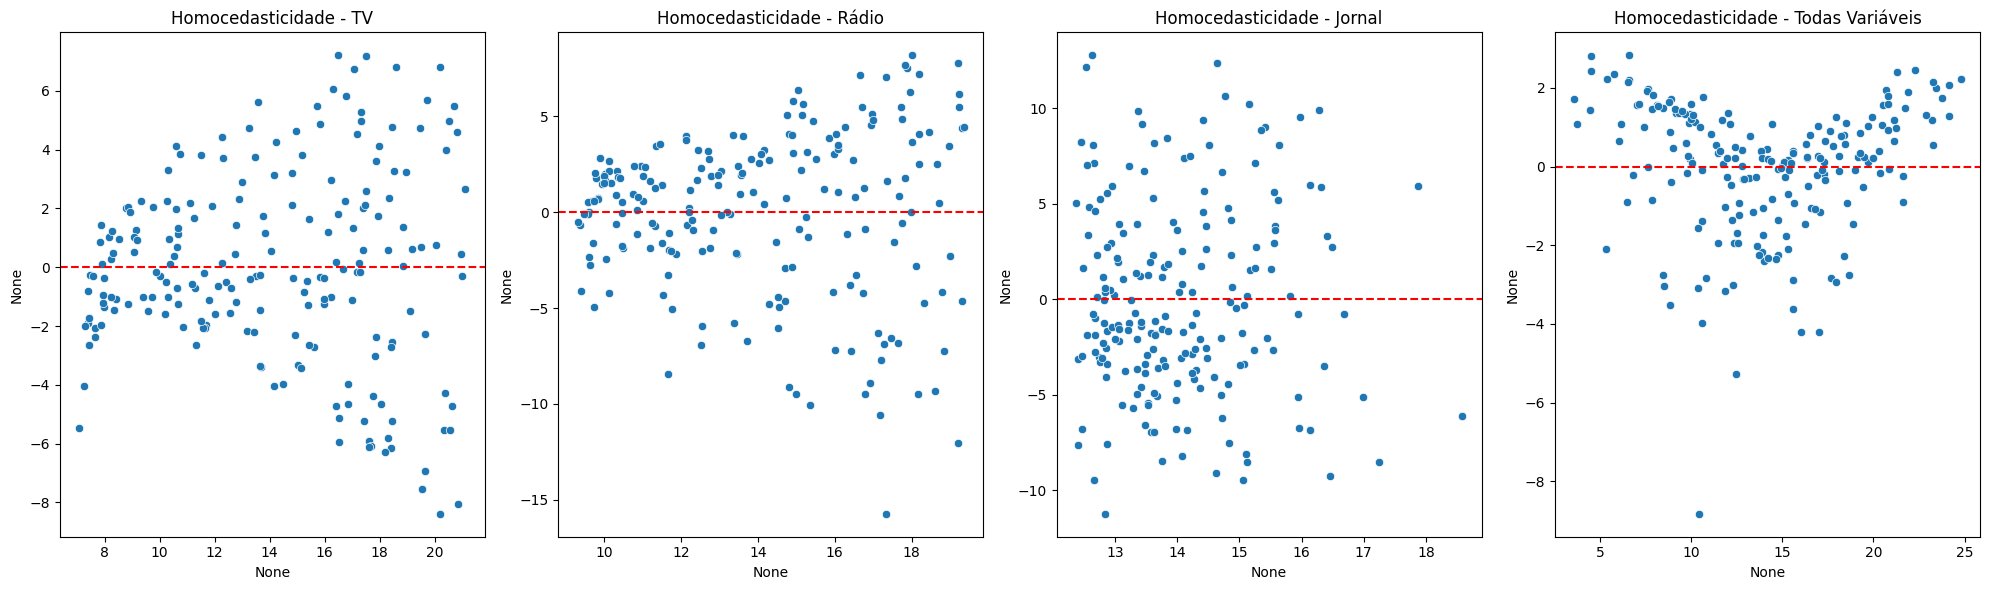

In [14]:
# Resíduos dos modelos
residuos_tv = modelo_tv.resid
residuos_radio = modelo_radio.resid
residuos_jornal = modelo_jornal.resid
residuos_total = modelo_total.resid

# Gráfico de homocedasticidade
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.scatterplot(x=modelo_tv.fittedvalues, y=residuos_tv)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - TV')

plt.subplot(1, 4, 2)
sns.scatterplot(x=modelo_radio.fittedvalues, y=residuos_radio)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Rádio')

plt.subplot(1, 4, 3)
sns.scatterplot(x=modelo_jornal.fittedvalues, y=residuos_jornal)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Jornal')

plt.subplot(1, 4, 4)
sns.scatterplot(x=modelo_total.fittedvalues, y=residuos_total)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Todas Variáveis')

plt.tight_layout()
plt.show()

O gráfico 4 (modelo com todas variáveis) mostra uma certa tendência na dispersão, podendo indicar heterocedasticidade.

#### Teste de Homocedasticidade com Breusch-Pagan

In [15]:
# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_tv", modelo_tv, prop['TV']),
    ("modelo_radio", modelo_radio, prop['Radio']),
    ("modelo_jornal", modelo_jornal, prop['Jornal']),
    ("modelo_total", modelo_total, prop.loc[:, prop.columns != 'Vendas'])
]

for nome, modelo, col in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {estatistica:.2e}')
    print(f'p-valor: {p:.2e}')
    print(f'f-valor: {fp:.2e}')
    print(f'f_p-valor: {f:.2e}')

Estatísticas de teste para modelo_tv: 4.80e+01
p-valor: 4.18e-12
f-valor: 1.76e-13
f_p-valor: 6.26e+01
Estatísticas de teste para modelo_radio: 3.66e+01
p-valor: 1.42e-09
f-valor: 2.57e-10
f_p-valor: 4.44e+01
Estatísticas de teste para modelo_jornal: 2.47e+00
p-valor: 1.16e-01
f-valor: 1.17e-01
f_p-valor: 2.48e+00
Estatísticas de teste para modelo_total: 5.13e+00
p-valor: 1.62e-01
f-valor: 1.64e-01
f_p-valor: 1.72e+00


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
* modelo_tv     p-valor < 0.05
* modelo_radio  p-valor < 0.05
* modelo_jornal p-valor > 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [16]:
for nome, modelo, col in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {estatistica_shapiro:.2e}')
    print(f'p-valor: {p_shapiro:.2e}')

Estatísticas de teste modelo_tv: 9.91e-01
p-valor: 2.13e-01
Estatísticas de teste modelo_radio: 9.61e-01
p-valor: 2.37e-05
Estatísticas de teste modelo_jornal: 9.82e-01
p-valor: 1.14e-02
Estatísticas de teste modelo_total: 9.18e-01
p-valor: 3.94e-09


#### Shapiro:
Se p-valor do shapiro é superior a 0.05,isso indica que os resíduos seguem aproximadamente uma distribuição normal.

- modelo_tv     p-valor > 0.05
- modelo_radio  p-valor > 0.05
- modelo_jornal p-valor < 0.05

#### Análise de normalidade QQ-plot

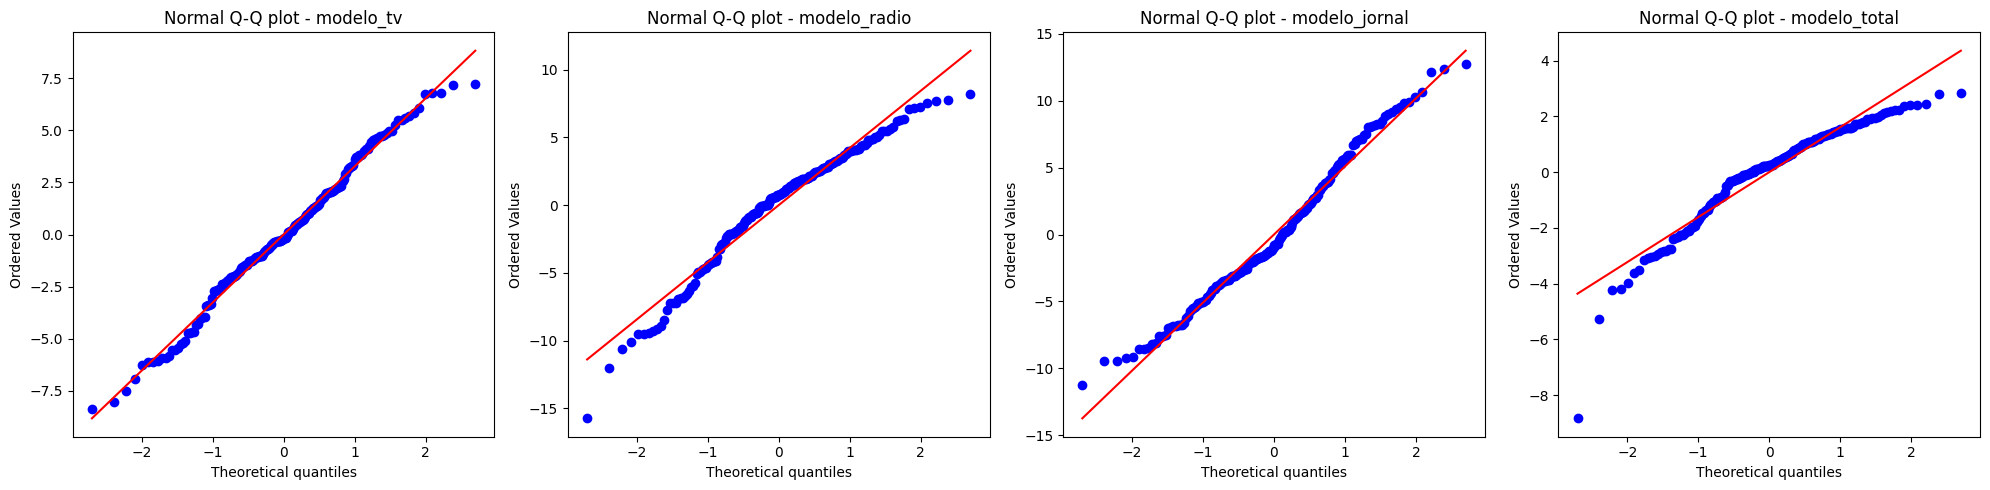

In [17]:
num_modelos = len(modelos)
fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    stats.probplot(modelo.resid,dist="norm", plot=ax)
    ax.set_title(f"Normal Q-Q plot - {nome}")
plt.tight_layout()
plt.show()

Aparentemente todos se aproximam da reta e parecem ser normais, sendo modelo_TV mais próximo da realidade.

#### Análise de resíduos Padronizados

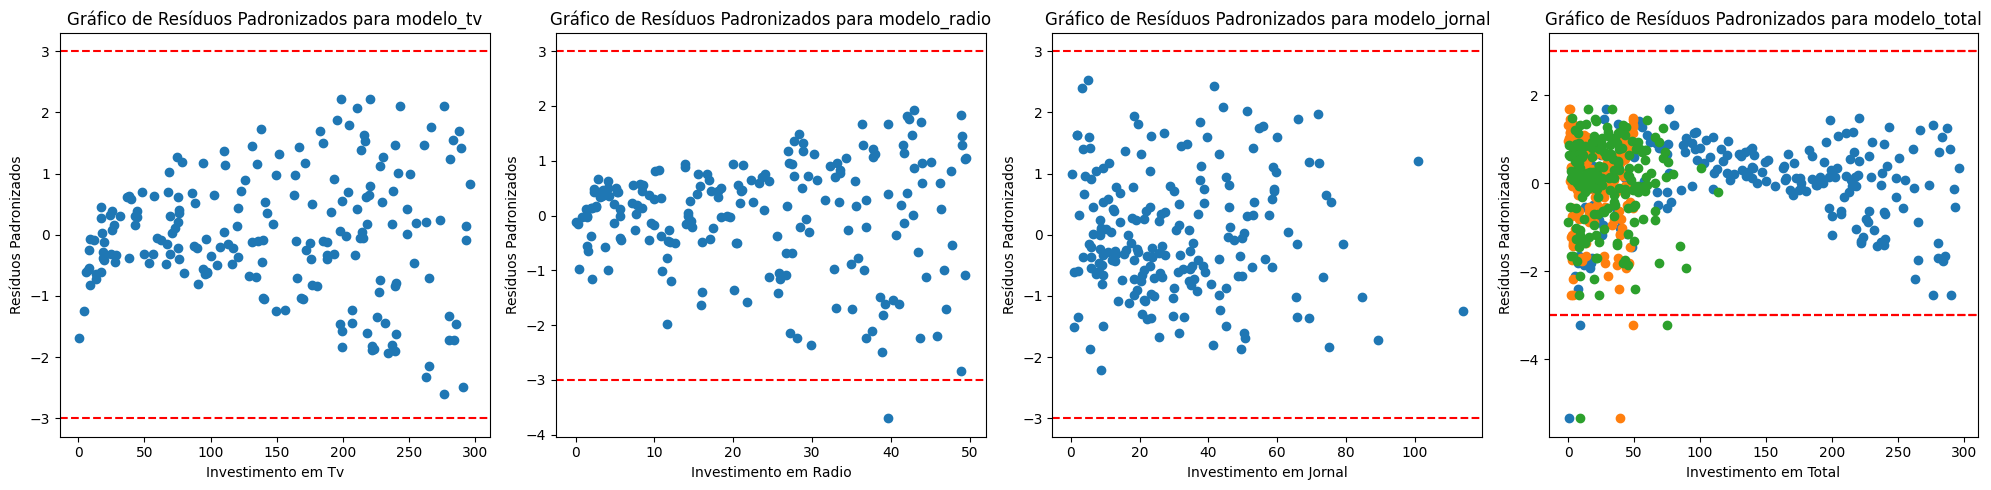

In [18]:
num_modelos = len(modelos)

fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 5))

for ax, (nome, modelo, col) in zip(axes, modelos):
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    if isinstance(col, pd.Series):
        ax.scatter(col, residuos_padronizados)
        ax.axhline(y=3, color='r', linestyle='--')
        ax.axhline(y=-3, color='r', linestyle='--')
        ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
        ax.set_xlabel('Investimento em ' + nome.split("_")[1].capitalize())
        ax.set_ylabel('Resíduos Padronizados')
    else:
        for i in col.columns:
            ax.scatter(col[i], residuos_padronizados)
            ax.axhline(y=3, color='r', linestyle='--')
            ax.axhline(y=-3, color='r', linestyle='--')
            ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
            ax.set_xlabel('Investimento em ' + nome.split("_")[1].capitalize())
            ax.set_ylabel('Resíduos Padronizados')

plt.tight_layout()
plt.show()

O modelo_total apresenta residuos com outlier além de 3 e -3

### 5. Análise de Multicolinearidade

In [19]:
vifs = [
    add_constant(prop['TV']),
    add_constant(prop['Radio']),
    add_constant(prop['Jornal']),
    add_constant(prop[prop.columns.difference(['Vendas'])])
]

for vif in vifs:
    print(pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns))
    print()

const    3.94808
TV       1.00000
dtype: float64

const    3.467627
Radio    1.000000
dtype: float64

const     2.978119
Jornal    1.000000
dtype: float64

const     6.848900
Jornal    1.145187
Radio     1.144952
TV        1.004611
dtype: float64



O output será um DataFrame que mostra o VIF para cada variável no conjunto de dados, incluindo a constante. Se o VIF for maior que 10 (ou, em alguns contextos, maior que 5), isso indica que há multicolinearidade significativa.

Neste exemplo, não há altos valores de VIF, indicando que não há a presença de multicolinearidade entre essas variáveis.

### 6. Análise do Modelo

In [20]:
for nome, modelo, dados in modelos:
    print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        20:59:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

| Modelo  | Teste T (Significância dos Coeficientes) | Teste F (Significância Global) | R² Ajustado |
|---------|-----------------------------------------|--------------------------------|-------------|
| TV      | ✅                                        | ✅                              | 0.610       |
| Rádio   | ✅                                        | ✅                              | 0.329       |
| Jornal  | ✅                                        | ✅                              | 0.047       |
| Total   | ❌(Jornal)                                | ❌(Jornal)                      | 0.896       |

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos (TV, Rádio e Jornal) apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo de TV tem um R² Ajustado de 0.610, indicando que cerca de 61% da variabilidade em Vendas é explicada pelo modelo. Os modelos de Rádio e Jornal têm R² Ajustado mais baixos, indicando um ajuste menos eficaz.

#### Grafico dos modelos ajustados

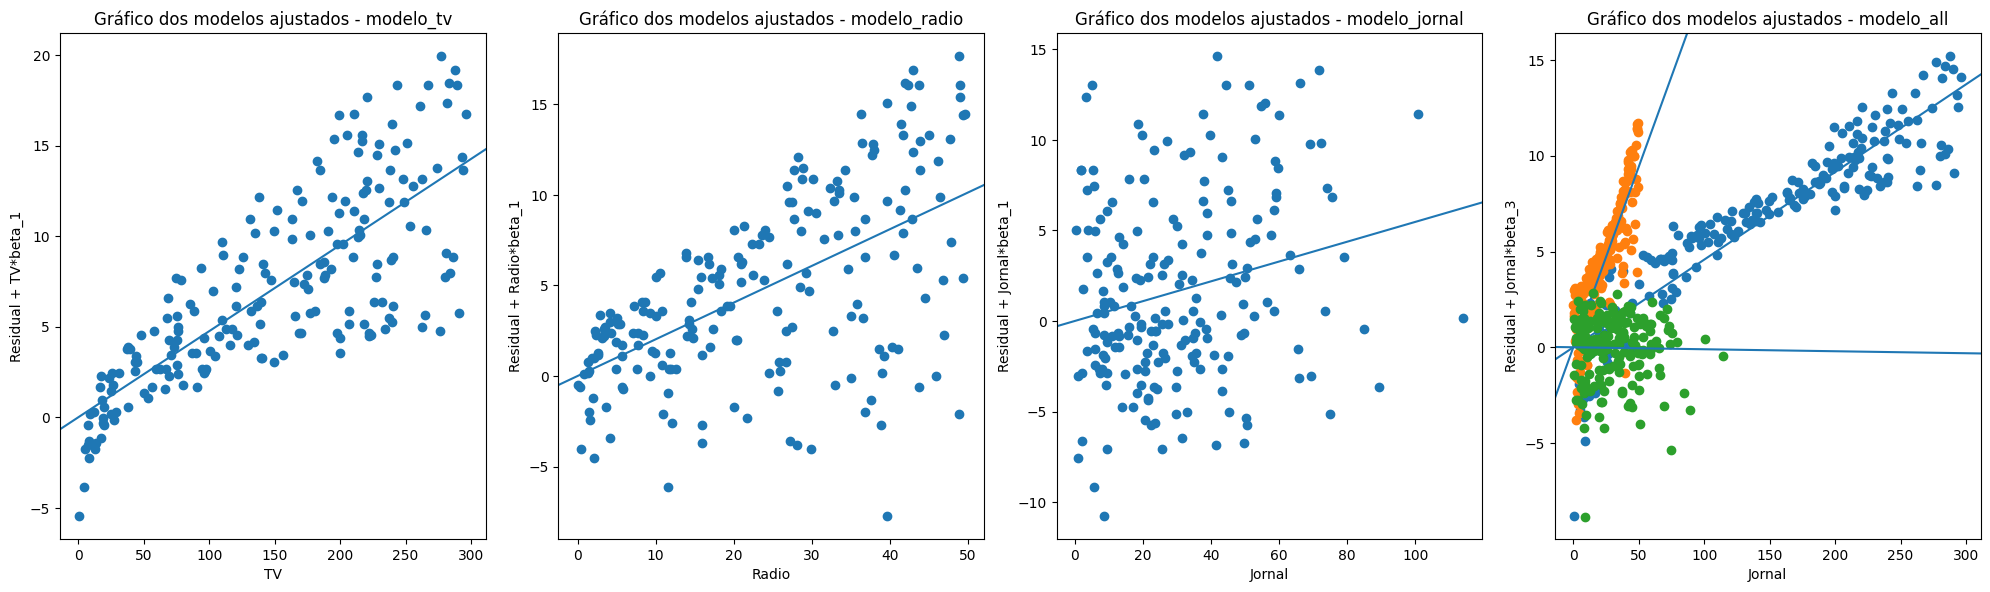

In [21]:
num_modelos = len(modelos)
fig, axes = plt.subplots(1, num_modelos, figsize=(5 * num_modelos, 6))

for ax, (nome, modelo, col) in zip(axes, modelos):
    if isinstance(col, pd.Series):
        sm.graphics.plot_ccpr(modelo, col.name, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - {nome}")
    else:
        for i in col.columns:
            sm.graphics.plot_ccpr(modelo, i, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - modelo_all")
plt.tight_layout(pad=1.0)
plt.show()


## Exercício 2 - Faça 3 modelos de regressão linear múltipla para predizer da melhor forma possível o preço dos automóveis a partir da base de dados 'preco_carro.csv'.

1. Modelo com todas variáveis

2. Modelo com as 3 variáveis mais correlacionadas

3. Modelo com as 5 variáveis mais correlacionadas

Na análise de dados e do modelo devem contemplar:

1. Análise descritiva

2. Calculo de correlação e covariância

3. Faça o modelo de regressão

4. Realize a análise de resíduos

5. Análise de multicolinearidade

6. Análise de outlier

7. Comparação de modelos

### 1. Análise descritiva

In [22]:
# Importação dos dados
preco_carro = pd.read_csv('preco_carro.csv')
preco_carro.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


Algumas colunas possuem espaço entre as palavras. Isto pode dar problema no momento da criação dos modelos. Vamos unir com underline(_).

In [23]:
preco_carro.rename(columns={'on road old': 'on_road_old',
                            'on road now': 'on_road_now',
                            'top speed': 'top_speed',
                            'current price': 'current_price'},
                                inplace=True, errors='raise')

In [24]:
preco_carro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on_road_old    1000 non-null   int64  
 2   on_road_now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top_speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current_price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [25]:
preco_carro.describe()

,v.id,on_road_old,on_road_now,years,km,rating,condition,economy,top_speed,hp,torque,current_price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


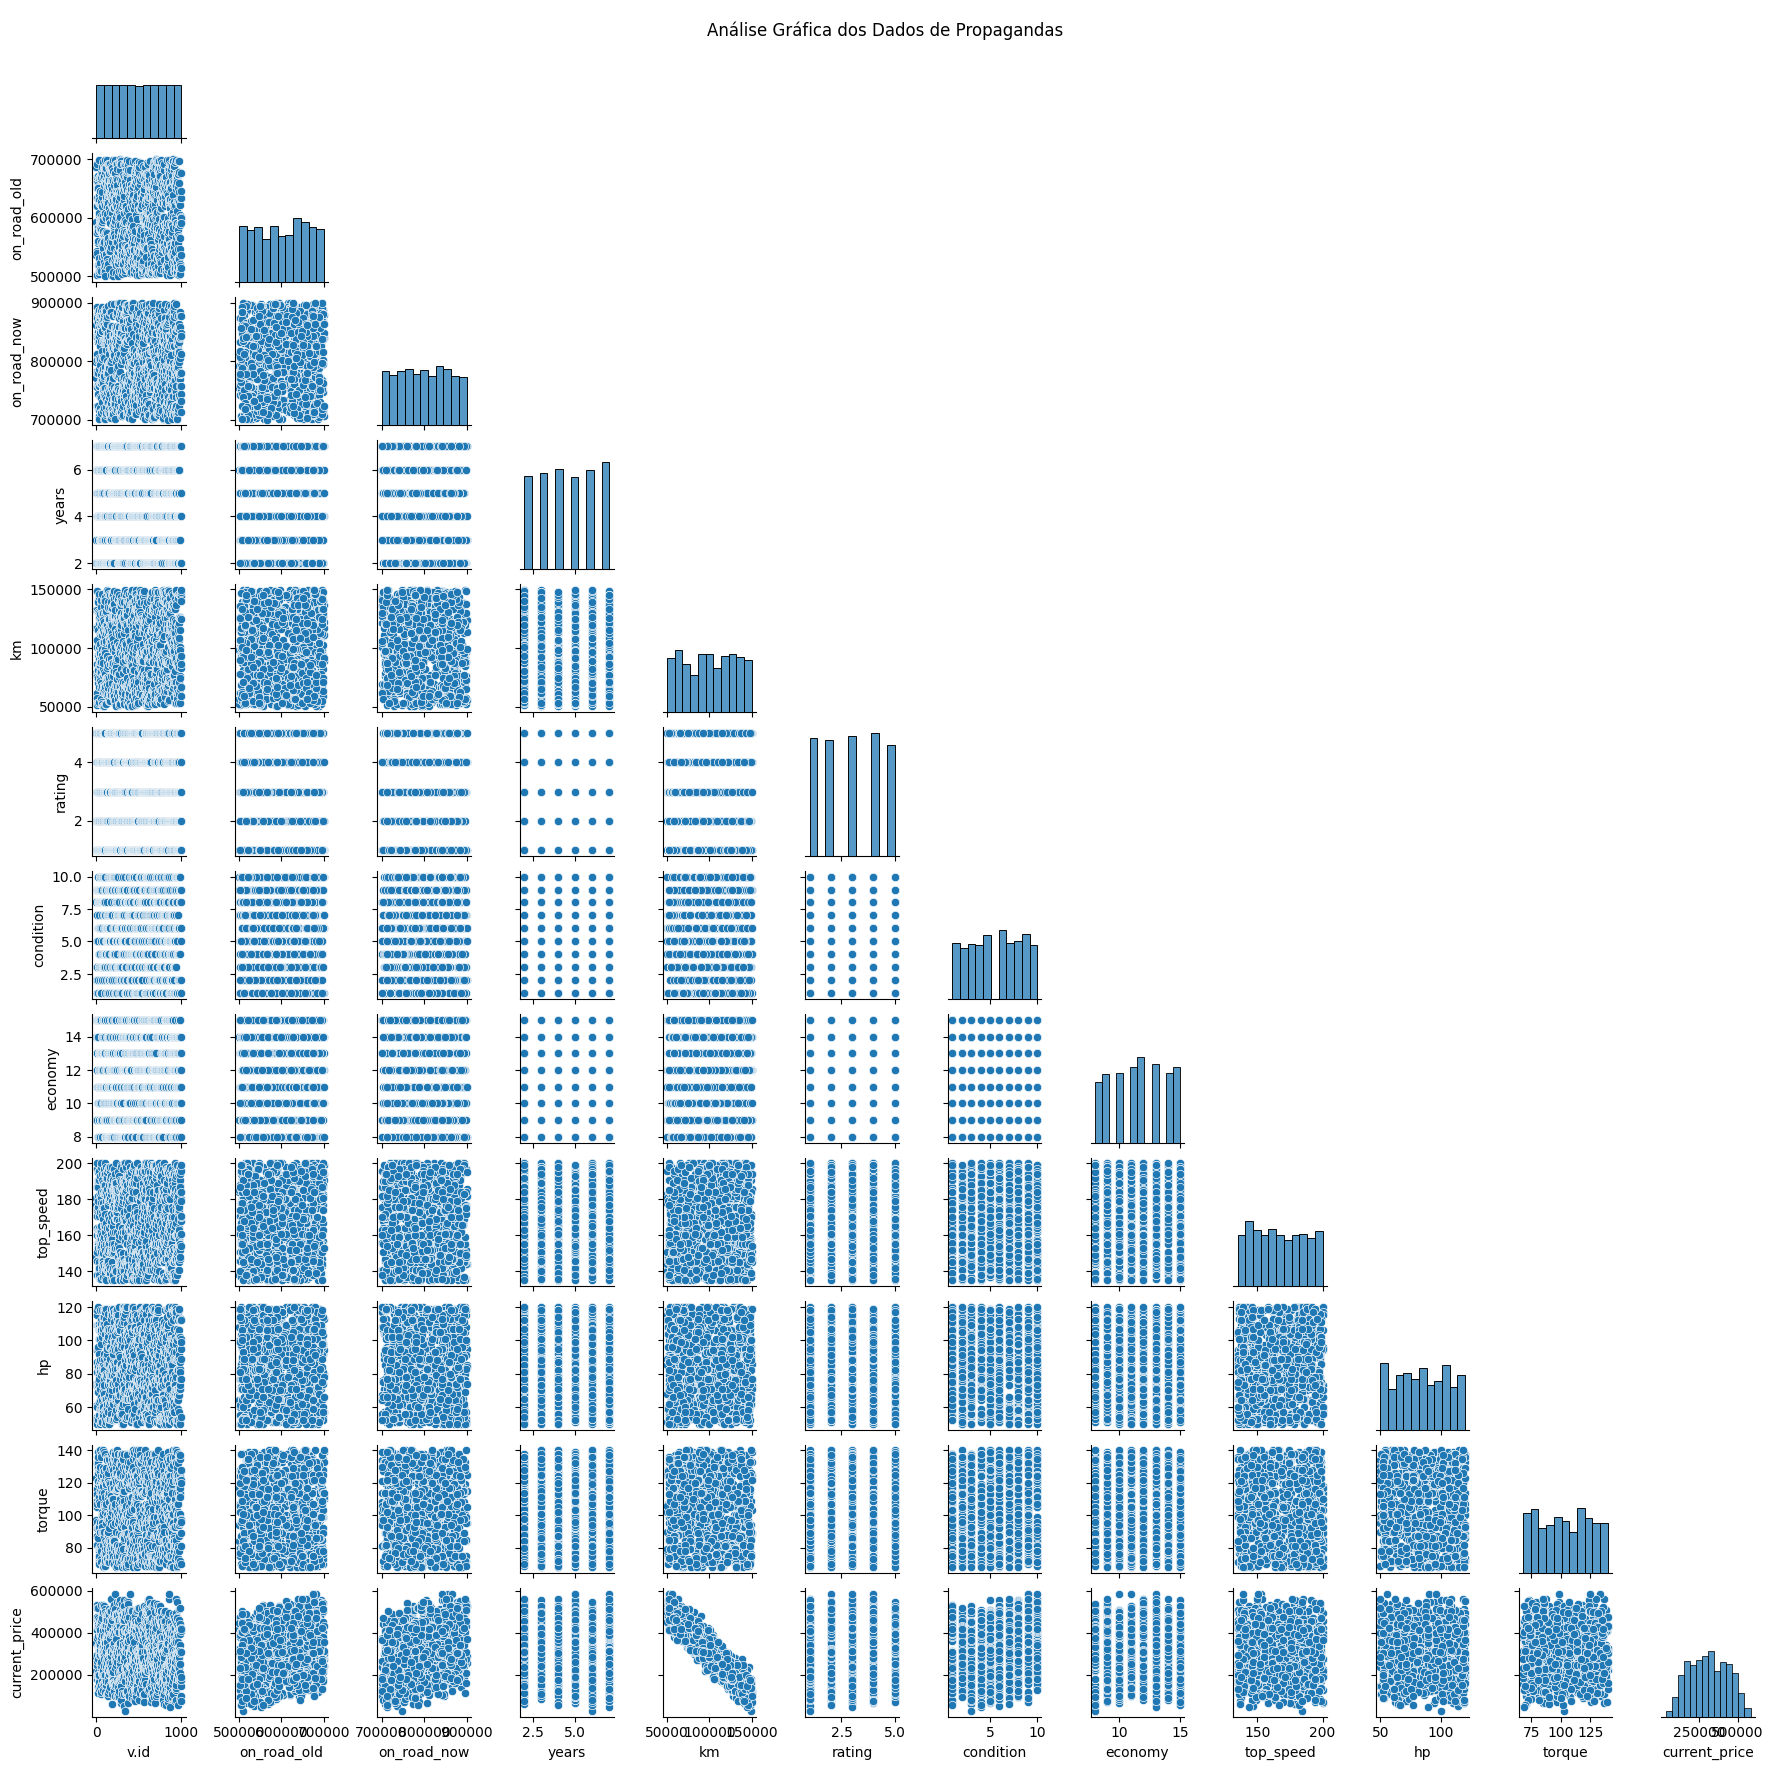

In [26]:
# Análise gráfica - Pairplot
sns.pairplot(preco_carro, corner=True, height=1.5)
plt.suptitle("Análise Gráfica dos Dados de Propagandas")
plt.show()

Da base de dados recebida, temos as seguintes pontuações:
* Todas as colunas são do tipo inteiro, exceto a última (float);
* Não há dados nulos na base o que retira a necessidade de tratamento prévio;
* Esta base possui 1000 linhas;
* Apenas analisando o pair-plot a coluna'km' possui uma certa relação com 'current_price'. As demais colunas aparentam uma variação bastante aleatória.

### 2. Calculo de correlação e covariância

<Axes: >

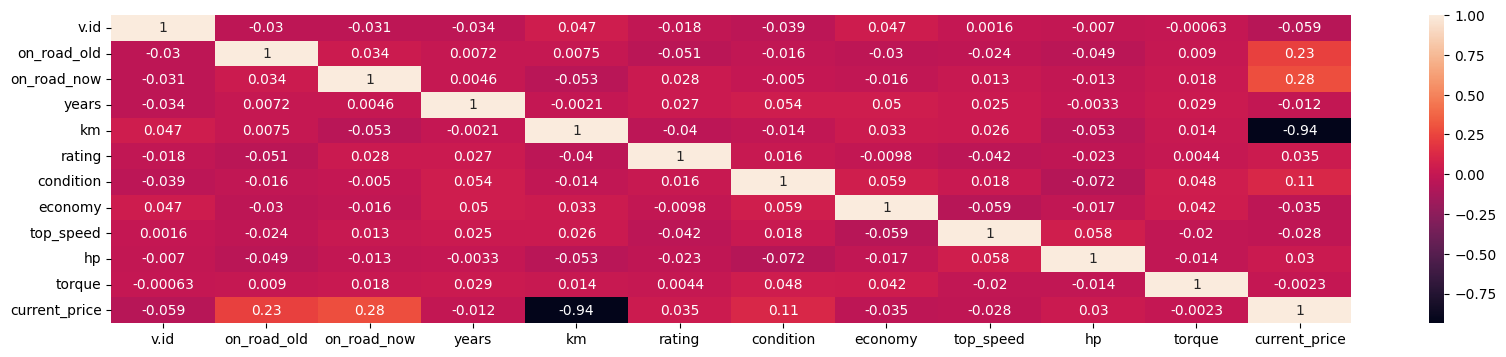

In [27]:
# Mapa de correlação
plt.figure(figsize=(20,4))
corr = preco_carro.corr()
sns.heatmap(corr, annot=True)

O que corrobora com o pairplot exposto anteriormente, a maior correlação entre variáveis é 'km' com 'current_price', seguido de 'on_road_now' e 'on_road_old' com 'current_price'.

### 3. Faça o modelo de regressão

Primeiramente vamos listar as colunas com maiores correlações com 'current_price'. Em seguida faremos 3 modelos:
* Todas as variáveis
* 3 variáveis mais correlacionadas
* 5 variáveis mais correlacionadas

In [28]:
lista_colunas = corr['current_price'].abs().sort_values(ascending=False).index.to_list()[1:]
lista_colunas

['km',
 'on_road_now',
 'on_road_old',
 'condition',
 'v.id',
 'rating',
 'economy',
 'hp',
 'top_speed',
 'years',
 'torque']

In [29]:
# Definindo a variável dependente (Current Price) e independentes
X_all = preco_carro[lista_colunas]  # Todas variáveis
X_3 = preco_carro[lista_colunas[:3]]  # 3 variáveis mais correlacionadas
X_5 = preco_carro[lista_colunas[:5]]  # 5 variáveis mais correlacionadas
y = preco_carro['current_price']  # Variável dependente (Vendas)

# Adicionando uma constante à variável independente
X_all = sm.add_constant(X_all)
X_3 = sm.add_constant(X_3)
X_5 = sm.add_constant(X_5)

# Ajustando o modelo de regressão linear
modelo_all = sm.OLS(y, X_all).fit()
modelo_3 = sm.OLS(y, X_3).fit()
modelo_5 = sm.OLS(y, X_5).fit()

# Sumário do modelo
modelo_all_summary = modelo_all.summary()
modelo_3_summary = modelo_3.summary()
modelo_5_summary = modelo_5.summary()

# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária.
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto).

### 4. Realize a análise de resíduos

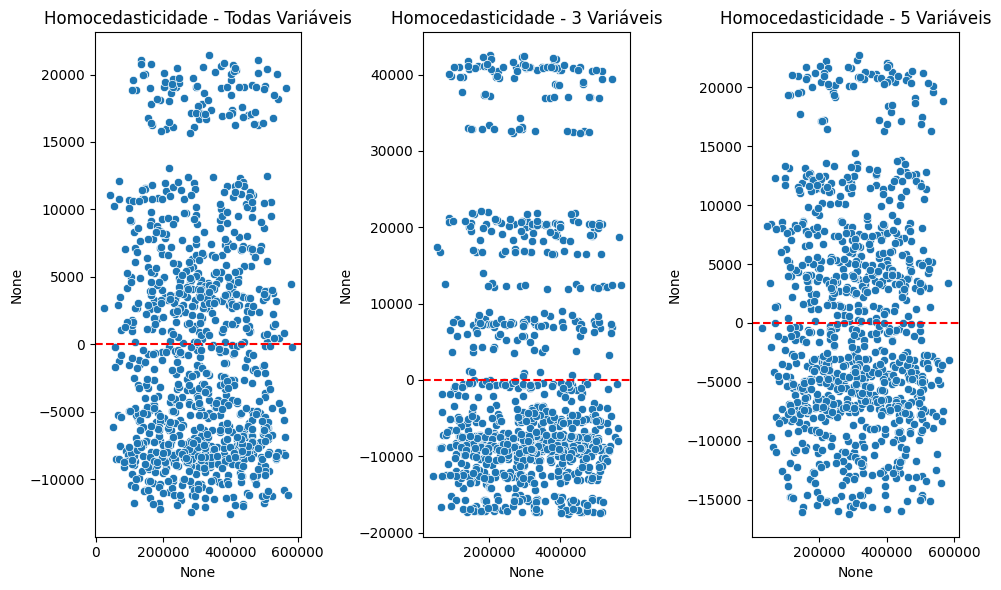

In [30]:
# Resíduos dos modelos
residuos_all = modelo_all.resid
residuos_3 = modelo_3.resid
residuos_5 = modelo_5.resid

# Gráfico de homocedasticidade
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=modelo_all.fittedvalues, y=residuos_all)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Todas Variáveis')

plt.subplot(1, 3, 2)
sns.scatterplot(x=modelo_3.fittedvalues, y=residuos_3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - 3 Variáveis')

plt.subplot(1, 3, 3)
sns.scatterplot(x=modelo_5.fittedvalues, y=residuos_5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - 5 Variáveis')

plt.tight_layout()
plt.show()

Todos os gráficos mostram certa tendência para pontos de erros positivos. Provavelmente todos terão heterocedasticidade.

#### Teste de Homocedasticidade com Breusch-Pagan

In [31]:
# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos_ex2 = [
    ("modelo_all", modelo_all, preco_carro[lista_colunas]),
    ("modelo_3", modelo_3, preco_carro[lista_colunas[:3]]),
    ("modelo_5", modelo_5, preco_carro[lista_colunas[:5]])
]

for nome, modelo, col in modelos_ex2:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {estatistica:.2e}')
    print(f'p-valor: {p:.2e}')
    print(f'f-valor: {fp:.2e}')
    print(f'f_p-valor: {f:.2e}')

Estatísticas de teste para modelo_all: 1.63e+02
p-valor: 2.68e-29
f-valor: 4.13e-32
f_p-valor: 1.75e+01
Estatísticas de teste para modelo_3: 7.23e-01
p-valor: 8.68e-01
f-valor: 8.68e-01
f_p-valor: 2.40e-01
Estatísticas de teste para modelo_5: 1.29e+02
p-valor: 3.40e-26
f-valor: 5.25e-28
f_p-valor: 2.95e+01


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
* modelo_all     p-valor < 0.05
* modelo_3       p-valor > 0.05
* modelo_5       p-valor < 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [32]:
for nome, modelo, col in modelos_ex2:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {estatistica_shapiro:.2e}')
    print(f'p-valor: {p_shapiro:.2e}')

Estatísticas de teste modelo_all: 9.20e-01
p-valor: 1.43e-22
Estatísticas de teste modelo_3: 8.02e-01
p-valor: 2.93e-33
Estatísticas de teste modelo_5: 9.58e-01
p-valor: 2.08e-16


#### Shapiro:
Se p-valor do shapiro é superior a 0.05, isso indica que os resíduos seguem aproximadamente uma distribuição normal.

- modelo_all    p-valor < 0.05
- modelo_3      p-valor < 0.05
- modelo_5      p-valor < 0.05

#### Análise de normalidade QQ-plot

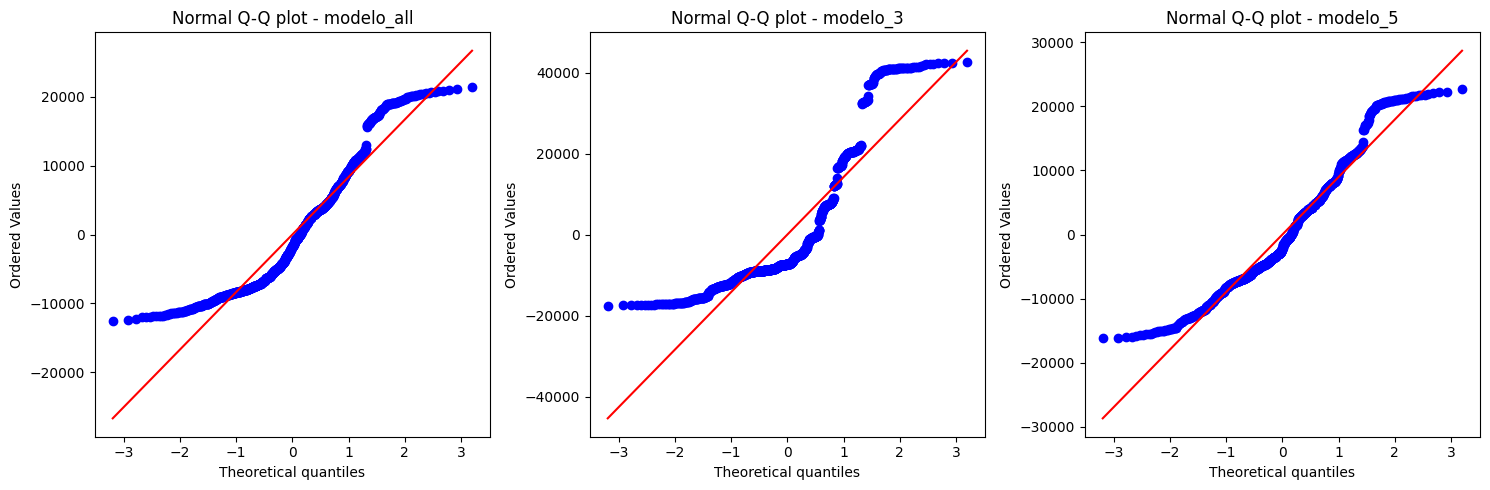

In [33]:
num_modelos_ex2 = len(modelos_ex2)

fig, axes = plt.subplots(1, num_modelos_ex2, figsize=(5 * num_modelos_ex2, 5))

for ax, (nome, modelo, col) in zip(axes, modelos_ex2):
    stats.probplot(modelo.resid,dist="norm", plot=ax)
    ax.set_title(f"Normal Q-Q plot - {nome}")
plt.tight_layout()
plt.show()

Aparentemente o modelo com todas variáveis e com 5 variaveis se aproximam melhor da reta.

#### Análise de resíduos Padronizados

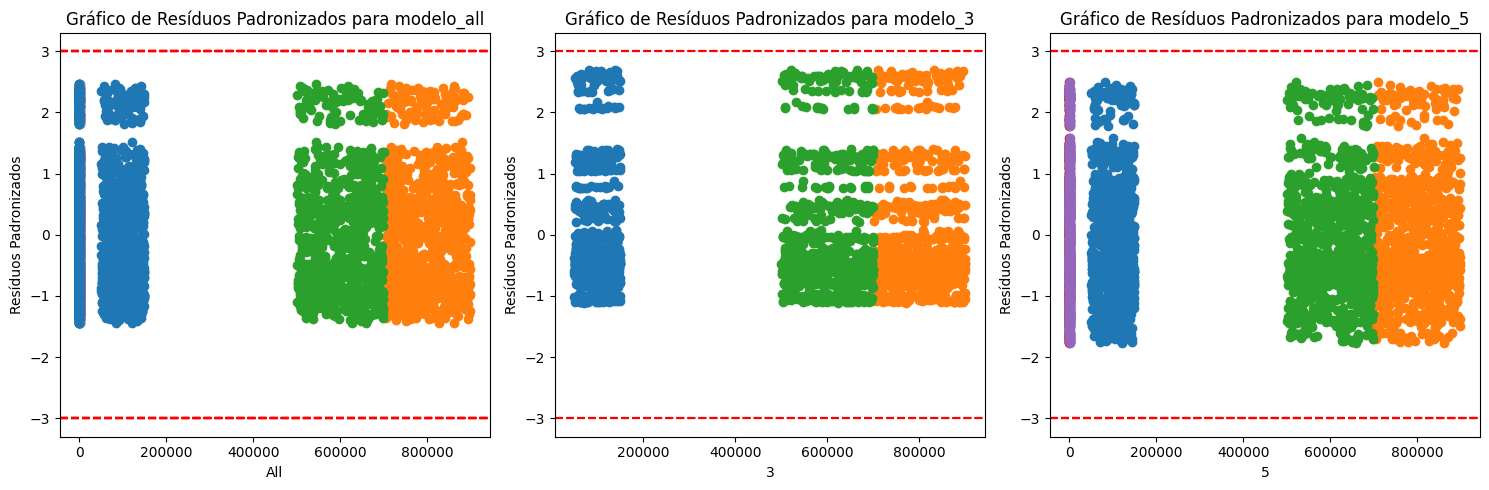

In [34]:
num_modelos_ex2 = len(modelos_ex2)

fig, axes = plt.subplots(1, num_modelos_ex2, figsize=(5 * num_modelos_ex2, 5))

for ax, (nome, modelo, col) in zip(axes, modelos_ex2):
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    if isinstance(col, pd.Series):
        ax.scatter(col, residuos_padronizados)
        ax.axhline(y=3, color='r', linestyle='--')
        ax.axhline(y=-3, color='r', linestyle='--')
        ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
        ax.set_xlabel(nome.split("_")[1].capitalize())
        ax.set_ylabel('Resíduos Padronizados')
    else:
        for i in col.columns:
            ax.scatter(col[i], residuos_padronizados)
            ax.axhline(y=3, color='r', linestyle='--')
            ax.axhline(y=-3, color='r', linestyle='--')
            ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
            ax.set_xlabel(nome.split("_")[1].capitalize())
            ax.set_ylabel('Resíduos Padronizados')

plt.tight_layout()
plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3

#### Análise geral dos residuos: 
| Modelo        | Breusch-Pagan (Homocedasticidade)  | Shapiro-Wilk (Normalidade)  | QQ-Plot   | Outliers |
|---------------|------------------------------------|-----------------------------|-----------|----------|
|Todas Variáveis| ❌                                | ❌                          | ✅       | ✅        |
|  3 Variáveis  | ✅                                | ❌                          | ❌       | ✅        |
|  5 Variáveis  | ❌                                | ❌                          | ✅       | ✅        |

### 5. Análise de multicolinearidade

In [35]:
vifs = [
    add_constant(preco_carro[lista_colunas]),
    add_constant(preco_carro[lista_colunas[:3]]),
    add_constant(preco_carro[lista_colunas[:5]])
]

for vif in vifs:
    print(pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns))
    print()

const          484.248446
km               1.011719
on_road_now      1.006572
on_road_old      1.009390
condition        1.016272
v.id             1.009148
rating           1.008845
economy          1.016010
hp               1.015279
top_speed        1.012311
years            1.008601
torque           1.005507
dtype: float64

const          311.077653
km               1.002926
on_road_now      1.004038
on_road_old      1.001252
dtype: float64

const          321.731634
km               1.005210
on_road_now      1.004828
on_road_old      1.002390
condition        1.001949
v.id             1.005421
dtype: float64



O output será um DataFrame que mostra o VIF para cada variável no conjunto de dados, incluindo a constante. Se o VIF for maior que 10 (ou, em alguns contextos, maior que 5), isso indica que há multicolinearidade significativa.

Neste exemplo, não há altos valores de VIF, indicando que não há a presença de multicolinearidade entre essas variáveis.

### 6. Análise de Outlier

#### Análise de resíduos Padronizados

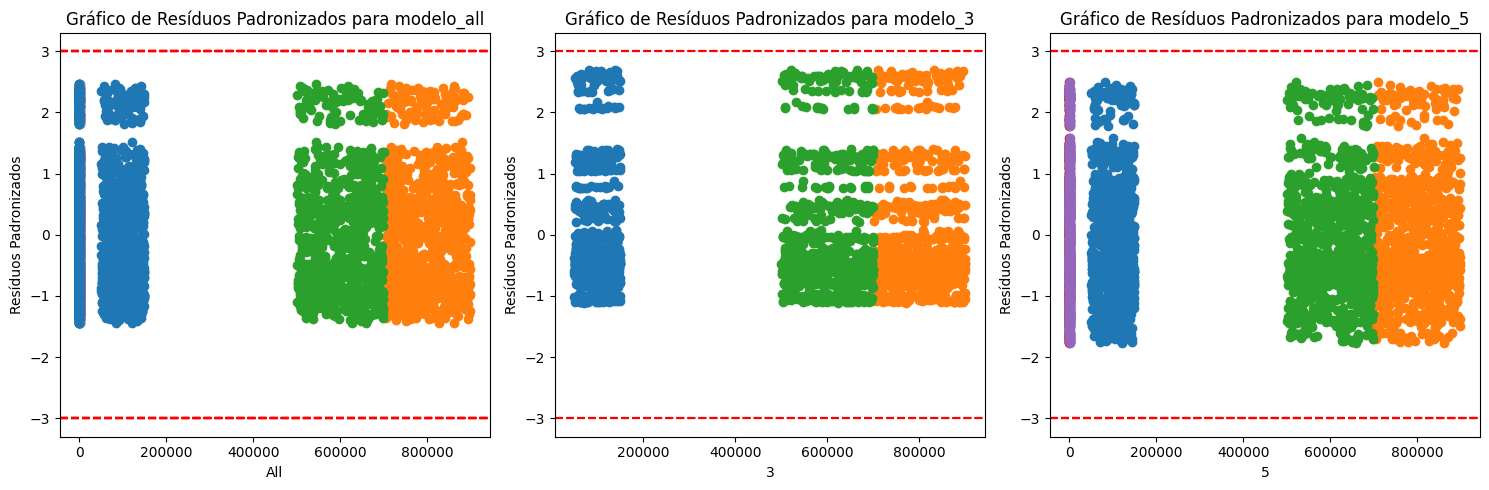

In [36]:
num_modelos_ex2 = len(modelos_ex2)

fig, axes = plt.subplots(1, num_modelos_ex2, figsize=(5 * num_modelos_ex2, 5))

for ax, (nome, modelo, col) in zip(axes, modelos_ex2):
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    if isinstance(col, pd.Series):
        ax.scatter(col, residuos_padronizados)
        ax.axhline(y=3, color='r', linestyle='--')
        ax.axhline(y=-3, color='r', linestyle='--')
        ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
        ax.set_xlabel(nome.split("_")[1].capitalize())
        ax.set_ylabel('Resíduos Padronizados')
    else:
        for i in col.columns:
            ax.scatter(col[i], residuos_padronizados)
            ax.axhline(y=3, color='r', linestyle='--')
            ax.axhline(y=-3, color='r', linestyle='--')
            ax.set_title(f'Gráfico de Resíduos Padronizados para {nome}')
            ax.set_xlabel(nome.split("_")[1].capitalize())
            ax.set_ylabel('Resíduos Padronizados')

plt.tight_layout()
plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3

### 7. Análise do Modelo

In [37]:
for nome, modelo, dados in modelos_ex2:
    print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:          current_price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.883e+04
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:00:02   Log-Likelihood:                -10488.
No. Observations:                1000   AIC:                         2.100e+04
Df Residuals:                     988   BIC:                         2.106e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.427e+04   6078.759     -2.347      

| Modelo          | Teste T (Significância dos Coeficientes)  | Teste F (Significância Global)   | R² Ajustado |
|-----------------|-------------------------------------------|----------------------------------|-------------|
| Todas variáveis | ❌                                        | ❌                              | 0.995       |
| 3 variáveis     | ✅                                        | ✅                              | 0.984       |
| 5 variáveis     | ❌                                        | ❌                              | 0.995       |

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo considerando todas as variáveis e 5 variáveis possuem mesmo R². Utilizar o modelo de 5 Variáveis será melhor, dada a menor carga computacional.

#### Grafico dos modelos ajustados

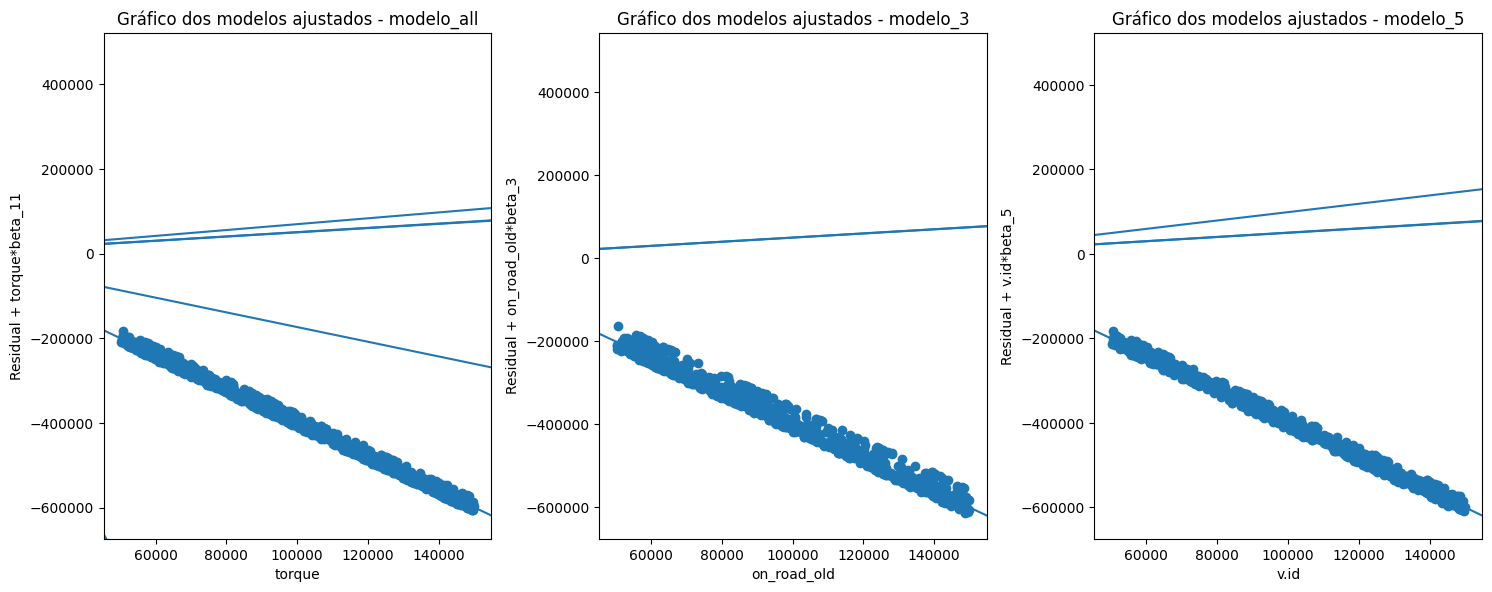

In [38]:
num_modelos_ex2 = len(modelos_ex2)
fig, axes = plt.subplots(1, num_modelos_ex2, figsize=(5 * num_modelos_ex2, 6))

for ax, (nome, modelo, col) in zip(axes, modelos_ex2):
    if isinstance(col, pd.Series):
        sm.graphics.plot_ccpr(modelo, col.name, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - {nome}")
    else:
        for i in col.columns:
            sm.graphics.plot_ccpr(modelo, i, ax=ax)
        ax.set_title(f"Gráfico dos modelos ajustados - {nome}")
plt.tight_layout(pad=1.0)
plt.show()